In [53]:
# Temperature data - Collins
import pandas as pd 
import csv
import os
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [31]:
# Import CSV
file = '/Users/bintucolley/disney-donut-project/Resources/avgtemp1901-2016.csv'
df_temp = pd.read_csv(file)
df_temp.head

<bound method NDFrame.head of       Temperature - (Celsius)   Year    Statistics     Country  ISO3
0                     27.7179   1901   Jan Average   Australia   AUS
1                     27.3591   1901   Feb Average   Australia   AUS
2                     24.6881   1901   Mar Average   Australia   AUS
3                     21.3057   1901   Apr Average   Australia   AUS
4                     17.8553   1901   May Average   Australia   AUS
...                       ...    ...           ...         ...   ...
1387                  16.1341   2016   Aug Average   Australia   AUS
1388                  18.8000   2016   Sep Average   Australia   AUS
1389                  22.0308   2016   Oct Average   Australia   AUS
1390                  25.7045   2016   Nov Average   Australia   AUS
1391                  27.5676   2016   Dec Average   Australia   AUS

[1392 rows x 5 columns]>

In [32]:
# Display columns
df_temp.columns

Index(['Temperature - (Celsius)', ' Year', ' Statistics', ' Country', ' ISO3'], dtype='object')

In [33]:
# Renaming columns 
data_temp = df_temp.rename(columns={"Temperature - (Celsius)":"Mean Temperature(Celcius)"," Statistics":"Months"," Year":"Year"})

data_temp

,Mean Temperature(Celcius),Year,Months,Country,ISO3
0,27.7179,1901,Jan Average,Australia,AUS
1,27.3591,1901,Feb Average,Australia,AUS
2,24.6881,1901,Mar Average,Australia,AUS
3,21.3057,1901,Apr Average,Australia,AUS
4,17.8553,1901,May Average,Australia,AUS
...,...,...,...,...,...
1387,16.1341,2016,Aug Average,Australia,AUS
1388,18.8000,2016,Sep Average,Australia,AUS
1389,22.0308,2016,Oct Average,Australia,AUS
1390,25.7045,2016,Nov Average,Australia,AUS


In [34]:
# Removing the average on the Months
sliced_column = data_temp['Months'].str.slice(stop = 4)
sliced_column
data_temp["Months"] = sliced_column
data_temp["Months"]

0        Jan
1        Feb
2        Mar
3        Apr
4        May
        ... 
1387     Aug
1388     Sep
1389     Oct
1390     Nov
1391     Dec
Name: Months, Length: 1392, dtype: object

In [35]:
# Delete Redundant Columns
del data_temp[' Country']
del data_temp[' ISO3']
# Filter to 10 year Dataset
data_temp
data_temp_1986 = data_temp.loc[data_temp['Year'] > 1985, :]
# Reset index
data_temp_1986_2016 = data_temp_1986.reset_index(drop=True)
data_temp_1986_2016


,Mean Temperature(Celcius),Year,Months
0,27.7885,1986,Jan
1,27.8017,1986,Feb
2,27.0378,1986,Mar
3,22.4110,1986,Apr
4,18.6831,1986,May
...,...,...,...
367,16.1341,2016,Aug
368,18.8000,2016,Sep
369,22.0308,2016,Oct
370,25.7045,2016,Nov


In [36]:
# Group data by year and display stats
group_data_temp = data_temp_1986_2016.groupby(data_temp_1986_2016['Year'])
stats_temp = group_data_temp.describe()
stats_temp

Mean Temperature(Celcius)                                           \
                         count       mean       std      min        25%   
Year                                                                      
1986                      12.0  21.683200  5.276853  13.7292  17.807150   
1987                      12.0  21.710608  4.946575  14.2037  17.245300   
1988                      12.0  22.216350  4.841624  15.0208  18.317725   
1989                      12.0  21.471483  5.396369  13.5445  17.645075   
1990                      12.0  21.967142  5.397383  14.4219  17.896100   
1991                      12.0  22.145483  4.909459  14.5126  17.971550   
1992                      12.0  21.576192  4.898866  14.7177  17.670575   
1993                      12.0  21.824692  4.907187  14.7781  18.047950   
1994                      12.0  21.759325  5.188444  14.4436  17.590300   
1995                      12.0  21.651883  4.791211  14.4776  17.391350   
1996                      12.0  21.997850  4.668682  14.9305  17.958675   
1997                      12.0  21.727483  5.300506  13.4881  17.224225   
1998                      12.0  22.314442  5.038751  14.3071  18.693675   
1999                      12.0  21.775508  4.770858  14.7157  18.311475   
2000                      12.0  21.420500  5.035915  14.0938  16.394025   
2001                      12.0  21.475625  4.960916  14.3675  17.007475   
2002                      12.0  22.127992  4.987632  14.4791  18.344500   
2003                      12.0  22.131117  5.022468  14.8848  18.185025   
2004                      12.0  21.980450  5.259586  14.3299  17.232075   
2005                      12.0  22.506017  5.052445  15.0296  18.360950   
2006                      12.0  21.909517  5.534682  13.8069  16.848325   
2007                      12.0  22.129900  5.281443  13.4035  18.826100   
2008                      12.0  21.830917  5.140160  14.2569  17.580875   
2009                      12.0  22.257358  5.013152  14.7220  17.748175   
2010                      12.0  21.685558  5.083065  14.6815  17.455000   
2011                      12.0  21.458775  5.107702  14.2911  16.694825   
2012                      12.0  21.651075  5.297518  13.5886  16.979100   
2013                      12.0  22.661508  4.939375  15.3706  18.490450   
2014                      12.0  22.475333  5.243985  14.3826  18.635750   
2015                      12.0  22.296192  5.374448  14.3975  17.342075   
2016                      12.0  22.360167  5.122604  14.8634  18.133525   

                                    
           50%        75%      max  
Year                                
1986  21.91195  26.875050  27.8017  
1987  22.94415  25.845800  27.8549  
1988  23.49330  26.227650  28.9266  
1989  22.49290  25.790100  27.7796  
1990  22.45730  26.712850  28.4810  
1991  23.17155  26.014550  28.2684  
1992  22.29890  26.375400  27.5299  
1993  22.50950  25.880475  28.4114  
1994  22.46335  25.845725  28.6203  
1995  21.81000  25.825150  28.1464  
1996  22.37425  25.904775  27.9174  
1997  22.50915  26.253425  28.0478  
1998  22.72220  26.712325  28.6440  
1999  21.97605  25.871525  29.0046  
2000  21.87250  25.746250  27.1508  
2001  21.58095  24.960300  29.0295  
2002  23.45265  26.392825  27.7587  
2003  22.29260  26.342425  28.5896  
2004  23.49715  26.049075  28.2604  
2005  23.93570  26.786100  28.2958  
2006  22.50335  26.747550  28.9720  
2007  23.22745  26.174375  28.6834  
2008  22.68115  25.991650  28.9641  
2009  22.55305  26.993250  28.2459  
2010  22.53915  25.791950  28.4772  
2011  22.04620  25.687600  28.6973  
2012  22.56435  26.537900  27.9791  
2013  23.41210  26.427225  29.4761  
2014  23.67985  26.994225  28.8017  
2015  23.03405  27.166250  28.8897  
2016  22.91655  27.163275  28.3713

In [37]:
# Mean for each year
mean_temperature = group_data_temp.mean()


In [38]:
# Reset Index
new_mean_temperature = mean_temperature.reset_index()
new_mean_temperature

,Year,Mean Temperature(Celcius)
0,1986,21.683200
1,1987,21.710608
2,1988,22.216350
3,1989,21.471483
4,1990,21.967142
5,1991,22.145483
6,1992,21.576192
7,1993,21.824692
8,1994,21.759325
9,1995,21.651883


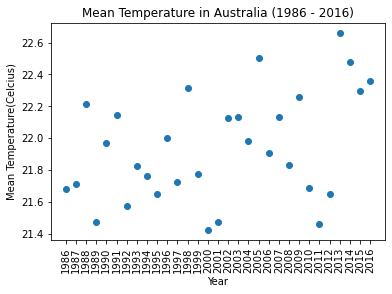

In [50]:

plt.scatter(new_mean_temperature['Year'],new_mean_temperature['Mean Temperature(Celcius)'])
plt.xlabel('Year')
plt.ylabel('Mean Temperature(Celcius)')
plt.title('Mean Temperature in Australia (1986 - 2016)')
plt.xticks(new_mean_temperature['Year'], rotation=90)
#plt.show()
plt.savefig('test.jpeg')

In [51]:
year = new_mean_temperature['Year']
m_temperature = new_mean_temperature['Mean Temperature(Celcius)']

In [54]:
# Perform a linear regression on year versus temperature
t_slope, t_int, t_r, t_p, t_std_err = stats.linregress(year, m_temperature)

In [55]:
# Create equation of line to calculate predicted violent crime rate
t_fit = t_slope * year + t_int

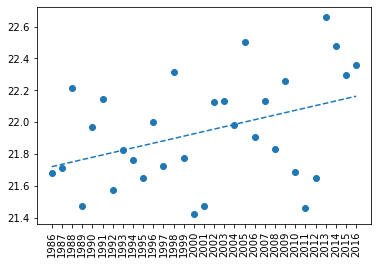

In [56]:
# Plot the linear model on top of scatter plot 
plt.scatter(year,m_temperature)
plt.plot(year,t_fit,"--")
plt.xticks(year, rotation=90)
plt.show()

In [58]:
# Calculate the crime rates for 2019
years = [2017,2018,2019,2020]
temps=[]
for year in years:
    fit = round(t_slope * year + t_int,2)
    temps.append(fit)

temps

In [69]:

# Create a DataFrame of frames using a dictionary of lists
new_temps = pd.DataFrame({'Year': years,
'Mean Temperature(Celcius)': temps})

new_temps



,Year,Mean Temperature(Celcius)
0,2017,22.18
1,2018,22.19
2,2019,22.21
3,2020,22.22


In [71]:
# Append new dataframe to the previous Dataframe
mean_temp_1986_2020 = new_mean_temperature.append(new_temps, ignore_index=True)
mean_temp_1986_2020

,Year,Mean Temperature(Celcius)
0,1986,21.683200
1,1987,21.710608
2,1988,22.216350
3,1989,21.471483
4,1990,21.967142
5,1991,22.145483
6,1992,21.576192
7,1993,21.824692
8,1994,21.759325
9,1995,21.651883


Text(0.5, 1.0, 'Mean Temperature Vs Year')

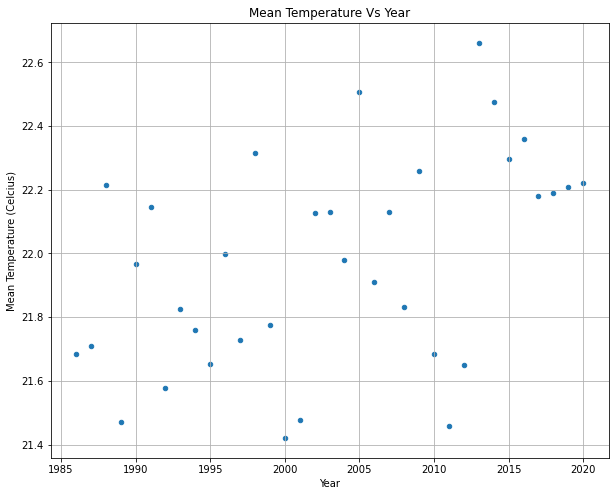

In [93]:
# Scatter graph for 1985 - 2020
mean_temp_1986_2020.plot(kind='scatter',x='Year',y='Mean Temperature(Celcius)',figsize = (10,8))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel("Mean Temperature (Celcius)")
plt.title("Mean Temperature Vs Year")


In [40]:
# Rainfall data - Thierry


In [41]:
# CO2 data - Jim


In [42]:
# Deforestation data - Spyro


In [43]:
# Bushfire incident data - Vanessa
